## K-Means clustering analysis of the data

In [3]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Custom KMeans class has been created, and can now be used for clustering
src_path = os.path.abspath(os.path.join('..', 'src'))
sys.path.append(src_path)
from kmeans import CustomKMeans, plot_clusters

# Import the cleaned data for use in the project
cleaned_data_path = os.path.abspath(os.path.join('..', 'data', 'cleaned', 'car_prices_cleaned.csv'))
car_df = pd.read_csv(cleaned_data_path)
car_df.head(5)

fordpickup = os.path.abspath(os.path.join('..', 'data', 'raw', 'google_trends', 'ford_pickup.csv'))
camry = os.path.abspath(os.path.join('..', 'data', 'raw', 'google_trends', 'toyota_camry.csv'))
altima = os.path.abspath(os.path.join('..', 'data', 'raw', 'google_trends', 'nissan_altima.csv'))

onefifty_df = pd.read_csv(fordpickup)
camry_df = pd.read_csv(camry)
altima_df = pd.read_csv(altima)


Running CustomKMeans for k=1
converged at iteration 2


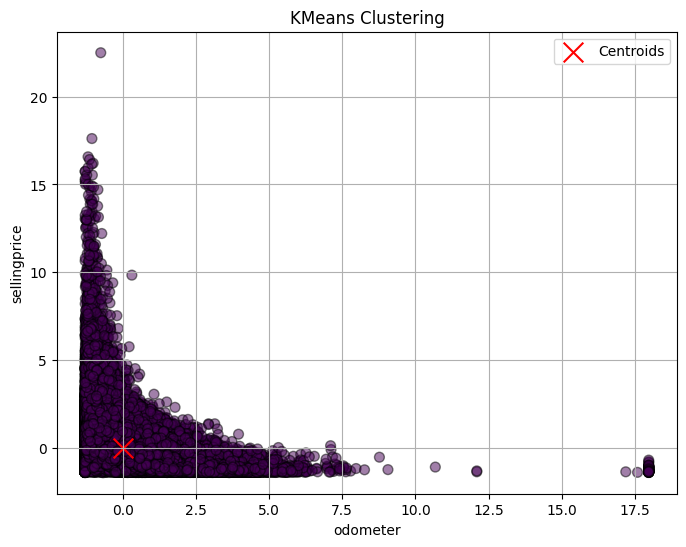

Inertia for k=1: 2361680.0

Running CustomKMeans for k=2
converged at iteration 15


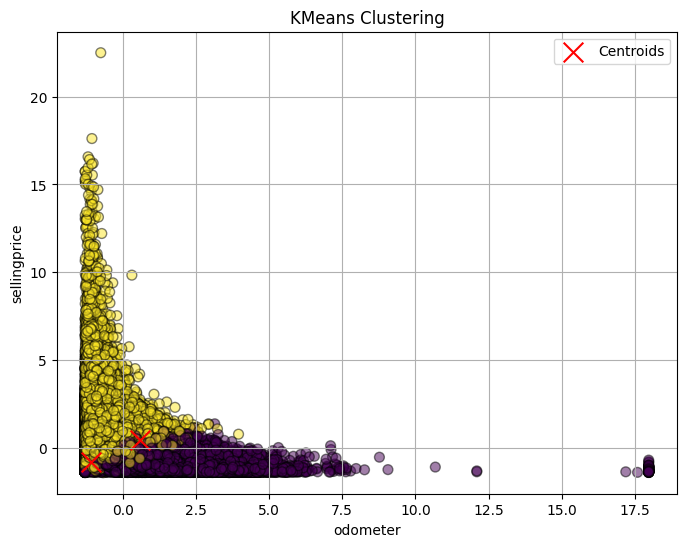

Inertia for k=2: 1254674.102791069

Running CustomKMeans for k=3
converged at iteration 33


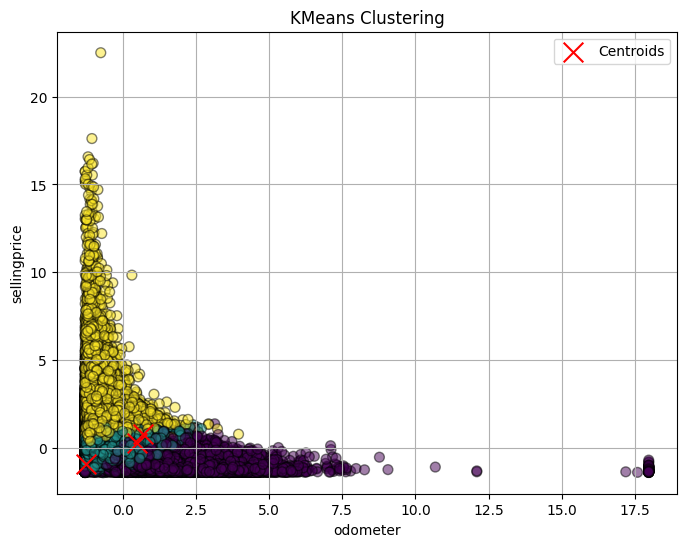

Inertia for k=3: 925065.4190692673

Running CustomKMeans for k=4
converged at iteration 61


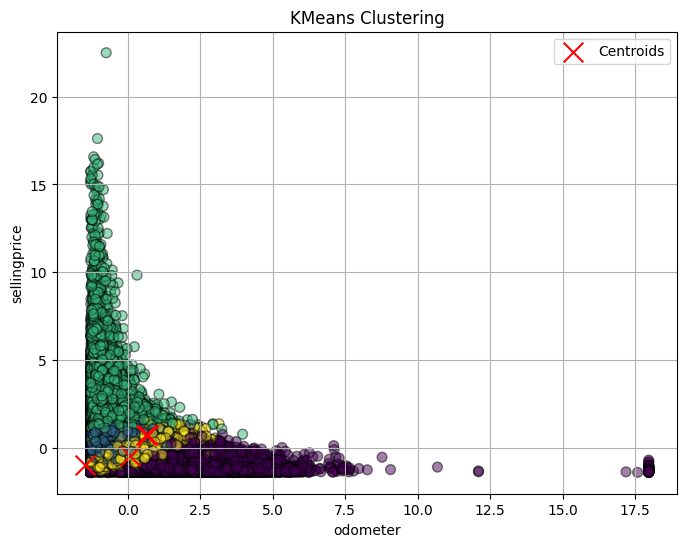

Inertia for k=4: 777784.4466203718

Running CustomKMeans for k=5
converged at iteration 50


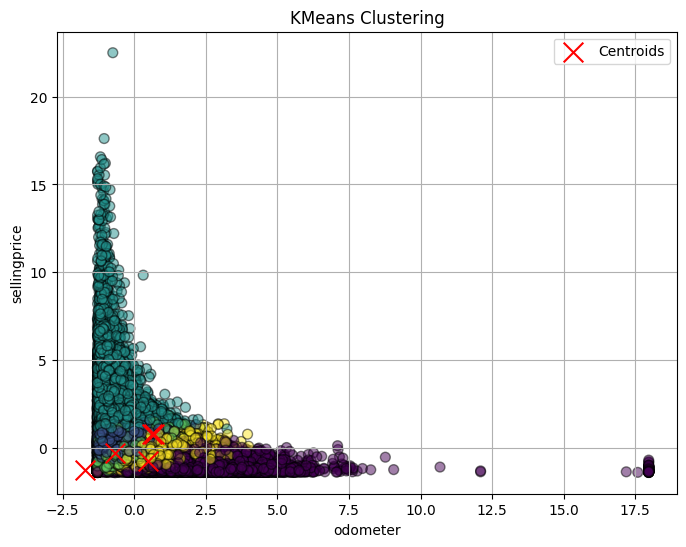

Inertia for k=5: 685498.2282615284



In [4]:
# The clustering can now be carried out using the imported KMeans class
# Clustering can only work using numeric data, therefore only numeric data must be selected
from sklearn.preprocessing import StandardScaler
df = car_df.select_dtypes(include=[np.number])

#When running the data without scaling the values, the centroids are in the same spot with huge inertia values
#Using the standard scaler from sklearn can help the data be more readable
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# The following code uses the CustomKmMeans class in order to create a clustering of odometer and sellingprice
for k in range(1,6):
    print(f"Running CustomKMeans for k={k}")
    kmeans_custom = CustomKMeans(k=k, max_iters=100, tol=1e-4, random_state=42)
    kmeans_custom.fit(df)
    labels = kmeans_custom.predict(df)
    plot_clusters(df, labels, kmeans_custom.centroids, 'odometer', 'sellingprice')
    print(f"Inertia for k={k}: {kmeans_custom.inertia_}\n")

